In [1]:
# import useful library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# **Section1**
When a professor has a higher RMP rating, more students tend to register. Conversely, when a professor has a lower RMP rating, more students tend to drop the course.

In [2]:
cs_grades = pd.read_csv('uic_GD_CS_14_24.csv')
meie_grades = pd.read_csv('uic_GD_MEIE_14_24.csv')

cs_rmp = pd.read_csv('uic_RMP_CS_14_24.csv')
meie_rmp = pd.read_csv('CS418_Team5_DataSet - RMP_MEIE_14_24.csv')

cs_grades['Primary Instructor'] = cs_grades['Primary Instructor'].str.strip()
cs_rmp['Instructor'] = cs_rmp['Instructor'].str.strip()

merged_data = pd.merge(cs_grades, cs_rmp, left_on='Primary Instructor', right_on='Instructor', how='inner')

grouped_courses = merged_data.groupby([ 'YEAR','SEMESTER', 'CRS NBR','CRS TITLE'])
multiple_instructors = grouped_courses.filter(lambda x: len(x['Primary Instructor'].unique()) > 2)
multiple_instructors.to_csv("multiple_instructors_rmp.csv", index=False)
grouped_registrations = merged_data.groupby('Rating')['Grade Regs'].mean().reset_index()

/var/folders/5p/qvx0rb6n1z32pm4tq8z0r8jm0000gn/T/ipykernel_19568/3862134433.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 250)


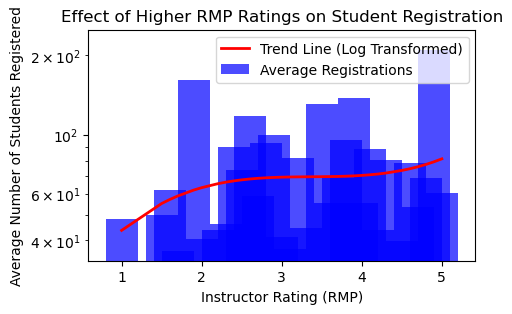

In [10]:
x = grouped_registrations['Rating']
y = grouped_registrations['Grade Regs']
y_log = np.log(y)

coefficients = np.polyfit(x, y_log, deg=3)
trend_line_log = np.polyval(coefficients, x)

trend_line = np.exp(trend_line_log)
plt.figure(figsize=(5, 3))
plt.bar(x, y, width=0.4, color='blue', alpha=0.7, label='Average Registrations')

plt.yscale('log')
plt.plot(x, trend_line, color='red', linestyle='-', linewidth=2, label='Trend Line (Log Transformed)')

plt.xlabel('Instructor Rating (RMP)')
plt.ylabel('Average Number of Students Registered')
plt.title('Effect of Higher RMP Ratings on Student Registration')
#plt.yticks([10, 20, 60, 120, 240])
plt.ylim(0, 250)

plt.legend()
plt.show()

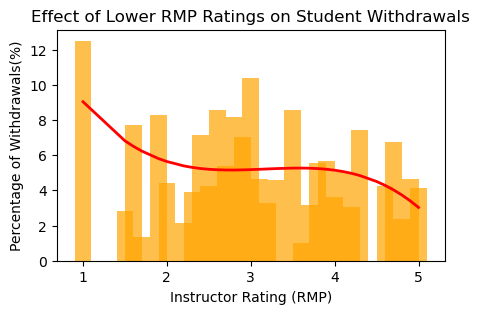

In [11]:
grouped_data = merged_data.groupby('Rating').agg({'W': 'sum', 'Grade Regs': 'sum'}).reset_index()
grouped_data['Withdraw_Rate'] = (grouped_data['W'] / grouped_data['Grade Regs'])*100

x = grouped_data['Rating']
y = grouped_data['Withdraw_Rate']

coefficients = np.polyfit(x, y, deg=3)
trend_line = np.polyval(coefficients, x)

plt.figure(figsize=(5, 3))
plt.bar(grouped_data['Rating'], grouped_data['Withdraw_Rate'], width=0.2, color='orange', alpha=0.7, label='Withdrawal Rate')
plt.plot(x, trend_line, color='red', linestyle='-', linewidth=2, label='Trend Line')

plt.xlabel('Instructor Rating (RMP)')
plt.ylabel('Percentage of Withdrawals(%)')
plt.title('Effect of Lower RMP Ratings on Student Withdrawals')
plt.show()